The contents of this course including lectures, labs, homework assignments, and exams have all been adapted from the [Data 8 course at University California Berkley](https://data.berkeley.edu/education/courses/data-8). Through their generosity and passion for undergraduate education, the Data 8 community at Berkley has opened their content and expertise for other universities to adapt in the name of undergraduate education.

In [1]:
#!pip install datascience
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Chapter 9 Review

In [2]:
# Create a function that simulates 10000 flips of a coin. 
# Record the number of heads and tails that are flipped in the simulation.
# Save the results in a data table.

def ht_outcome(games):
    ht= make_array('heads', 'tails')
    heads_score = 0
    tails_score = 0
    for i in np.arange(games):
        flip = np.random.choice(ht)
        if flip == "heads":
            heads_score += 1
        else: tails_score += 1
    return Table().with_columns("Heads Score", heads_score, "Tails Score", tails_score)
ht_outcome(10000)

Heads Score,Tails Score
4959,5041


# Probability Review

## Equally likely Outcomes

Assuming all outcomes are equally likely, the chance of an event, A is:

P(A) = # of outcomes that make A happen / Total number of outcomes

## Multiplication Rule

Change that two events, A and B, both happen:

P(A)(B) = P(A happens) * P(B happens given that A has happend) 

* The more conditions you have to satisfy the less likely the event will happen

## Addition Rule

If an event can happen one of two ways:

P(A) = P(first way) + P(second way)

## At least one Success

Chance that A does not happen at least once.

P(not A) = 1 - P(A)

At least one head in three coin tosses?

P(not TTT) = 1 - P(TTT) = 1 - (1/2)^3 = 1 - (1/8) = 87.5%

Possibilities from 3 coin flips:
HHH,
HTH,
HHT,
THH,
TTT,
TTH,
THT,
HTT

Probability that I will get no heads is 1 - (1/8) = 87.5%


### HW 6
Question 2.6. Compute the chance that the monkey types the letter "t" at least once in the 5 strikes. Call it t_chance. Use algebra and type in an arithmetic equation that Python can evalute. 

t_chance = 1 - (61/62)**5

In [11]:
t_count = 0
simulate_one_type = [1, 2, 3, 4, 5]
simulate_one_type
if 1 in simulate_one_type:
    t_count += 1
t_count

1

In [16]:
np.random.choice(simulate_one_type, 5)

array([4, 2, 3, 2, 1])

In [17]:
keyboard = np.arange(62)
keyboard

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [23]:
simulate_one_type = np.random.choice(keyboard, 5)
simulate_one_type

array([50, 25, 58, 39, 32])

In [24]:
def simulate_key_strokes(num_simulations):
    keyboard = np.arange(62)
    t_count = 0
    for i in np.arange(num_simulations):
        simulate_one_type = np.random.choice(keyboard, 5)
        if 1 in simulate_one_type:
            t_count += 1
    return t_count/num_simulations

In [25]:
simulate_key_strokes(1*10**6)

0.078079

In [26]:
1 - ((61/62)**5)

0.07808532616807251

In [30]:
 (1/52) * (1/51) *100

0.037707390648567124

### What are the chances we select the Ace of Hearts and the Ace of Dimonds in a deck of 52 cards without replacement?

P  = (1/52) * (1/51) = 0.038%

### What are the chances neither the Ace of Hearts and the Ace of Dimonds in a deck of 52 cards without replacement?

P = (50/52) * (49/51) = 92.4%

# Chapter 10: Sampling and Empirical Distributions

An important part of data science is infering meaning from random samples.  This chapter takes a closer look at sampling and random samples.

In [34]:
top1 = Table.read_table('top_movies.csv')
top2 = top1.with_column('Row Index', np.arange(top1.num_rows))
top = top2.move_to_start('Row Index')

top.set_format(make_array(3, 4), NumberFormatter)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
2,The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
6,Jaws,Universal,"260,000,000","1,138,620,700",1975
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
8,The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


We can create a ***deterministic sample*** by selecting specific elements from the table (i.e. not randomly).

In [35]:
top.take([1, 10, 100])

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
10,Star Wars: The Force Awakens,Buena Vista,"936,662,225","961,143,200",2015
100,The Hunger Games,Lionsgate,"408,010,692","452,174,400",2012


In [36]:
top.where('Title', are.containing('Harry Potter'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,"317,575,550","497,066,400",2001
114,Harry Potter and the Deathly Hallows Part 2,Warner Brothers,"381,011,219","426,630,300",2011
131,Harry Potter and the Goblet of Fire,Warner Brothers,"290,013,036","401,608,200",2005
133,Harry Potter and the Chamber of Secrets,Warner Brothers,"261,988,482","399,302,200",2002
154,Harry Potter and the Order of the Phoenix,Warner Brothers,"292,004,738","377,314,200",2007
175,Harry Potter and the Half-Blood Prince,Warner Brothers,"301,959,197","359,788,300",2009
177,Harry Potter and the Prisoner of Azkaban,Warner Brothers,"249,541,069","357,233,500",2004


A ***population*** is the set of all elements

A ***probability sample*** is a set where the chance of subsets is calculatable.

A ***systematic sample*** is a set where the subsets are evenly spaced

## Sampling with or without Replacement

Random samples with replacement the value can be sampled again.  This is the default setting with <code>np.random.choice</code> when it samples from an array.

Random samples without replacement the value cannot be sampled again.  This is like dealing a deck of cards.

### Sample of Convenience

* Example: sample consists of whoever walks by
* Just because you think you’re sampling “randomly”, doesn’t mean you have a random sample.
* If you can’t figure out ahead of time 
    * what’s the population
    * what’s the chance of selection, for each group in the population
    <p>then you don’t have a random sample

## Empirical Distributions

The word *Emperical* means *observed*.  We will consider the emerical, observed, distributions of some data

In [37]:
die = Table().with_column('Face', np.arange(1, 7, 1))
die

Face
1
2
3
4
5
6


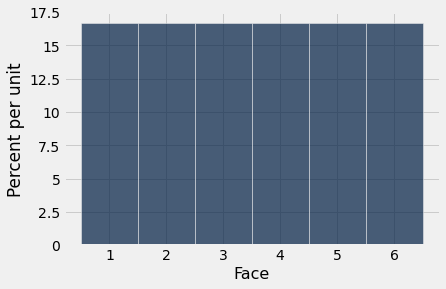

In [38]:
die_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = die_bins)

In [40]:
die.sample(10)

Face
1
1
2
2
6
5
1
4
6
2


In [41]:
def empirical_hist_die(n):
    die.sample(n).hist(bins = die_bins)

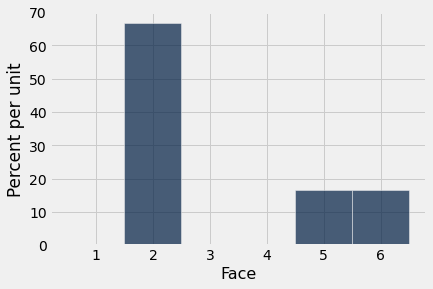

In [42]:
empirical_hist_die(6)

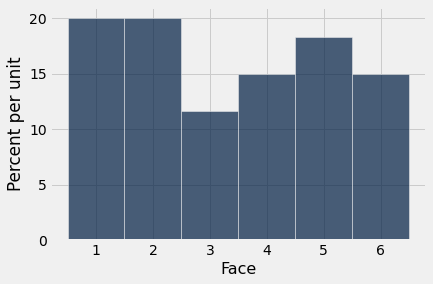

In [43]:
empirical_hist_die(60)

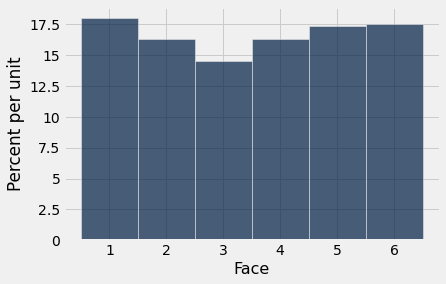

In [44]:
empirical_hist_die(600)

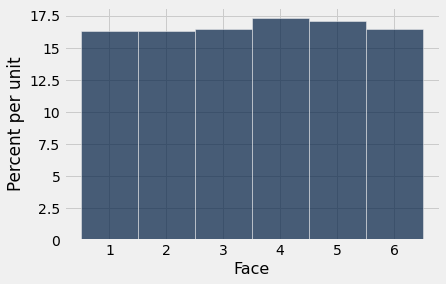

In [45]:
empirical_hist_die(6000)

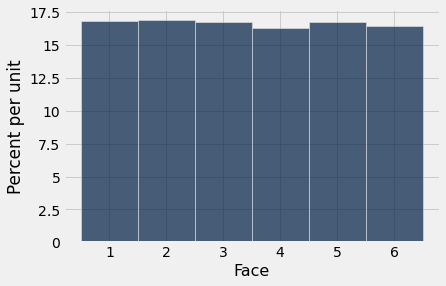

In [46]:
empirical_hist_die(60000)

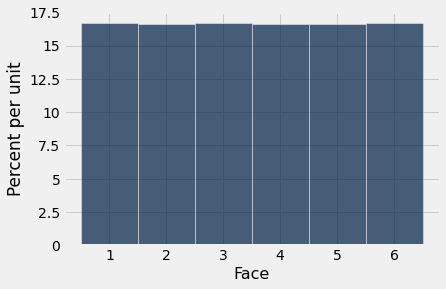

In [47]:
empirical_hist_die(6000000)

### The law of averages

If an event is repeated under identical conditions then the proportion of times the event occurs approaches the theoretical probability of the event

### Sampling from a Population

The table <code>united</code> contains data for United Airlines domestic flights from San Francisco in the summer of 2015.  The data are made publicly available by the [Bureau of Transportation Statistic](https://www.transtats.bts.gov/nosessionvar.asp) in the United States Department of Transportation.

In [48]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


Delay is the delay in mins.  Negative values mean those flights left early.

In [49]:
united.column('Delay').min()

-16

In [53]:
united.column('Delay').max()

580

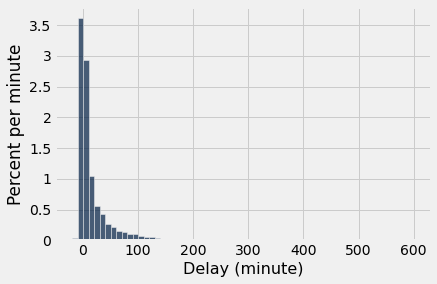

In [52]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
united.hist('Delay', bins = delay_bins, unit = 'minute')

In [54]:
united.where('Delay', are.above(200)).num_rows/united.num_rows

0.008390596745027125

Only about 0.8% of the flights had delays over 200 mins.  We will not plot those for visual convinience.

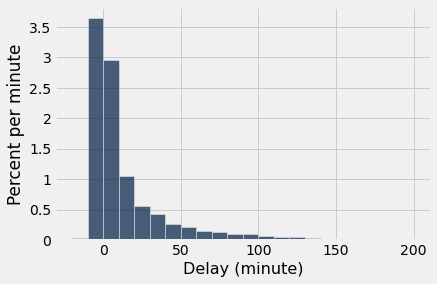

In [55]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')

What percent of flighs had a delaly between 0 and 10 mins?

In [56]:
united.where('Delay', are.between(0, 10)).num_rows/united.num_rows

0.2935985533453888

In [57]:
def empirical_hist_delay(n):
    united.sample(n).hist('Delay', bins = delay_bins, unit = 'minute')

As we saw with the dice, as the sample size increases, the empirical histogram of the sample more closely resembles the histogram of the population. Compare these histograms to the population histogram above.

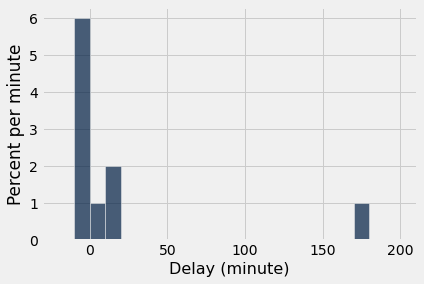

In [58]:
empirical_hist_delay(10)

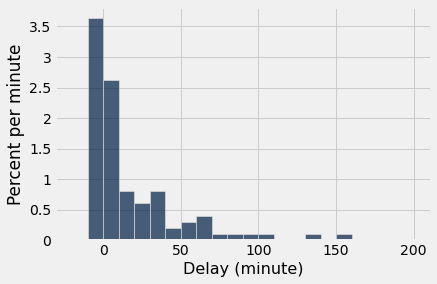

In [59]:
empirical_hist_delay(100)

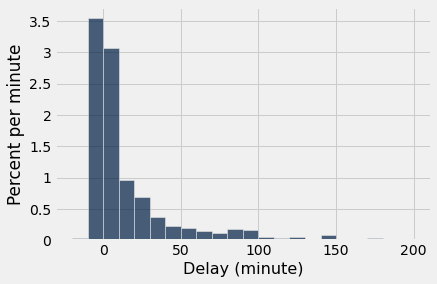

In [60]:
empirical_hist_delay(1000)

A large random sample is likely to resembel the population from which it was draw.

* The Law of Averages implies that with high probability, the empirical distribution of a large random sample will resemble the distribution of the population from which the sample was drawn.

Frequently, we are interested in numerical quantities associated with a population.

* In a population of voters, what percent will vote for Candidate A?

* In a population of Facebook users, what is the largest number of Facebook friends that the users have?

* In a population of United flights, what is the median departure delay?

Numerical quantities associated with a population are called parameters. For the population of flights in united, we know the value of the parameter “median delay”:

In [61]:
np.median(united.column('Delay'))

2.0

In [62]:
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

0.5018444846292948


Half of the united flights had delays less than 2 mins. Not too bad.

If we calculate the median on a sample of the data will we always calcualte the same media delay time?

In [63]:
np.median(united.sample(10).column('Delay'))

8.5

In [64]:
np.median(united.sample(100).column('Delay'))

2.0

In [65]:
np.median(united.sample(1000).column('Delay'))

3.0

In [66]:
np.median(united.sample(100000).column('Delay'))

2.0

### Lets simulate the median of a random sample using Python!

Step 1: Decide which statistic to simulate. We have already decided that: we are going to simulate the median of a random sample of size 1000 drawn from the population of flight delays.

Step 2: Write the code to generate one value of the statistic. Draw a random sample of size 1000 and compute the median of the sample. We did this in the code cell above. Here it is again, encapsulated in a function.

Step 3: Decide how many simulated values to generate. Let’s do 5,000 repetitions.

Step 4: Write the code to generate an array of simulated values. As in all simulations, we start by creating an empty array in which we will collect our results. We will then set up a for loop for generating all the simulated values. The body of the loop will consist of generating one simulated value of the sample median, and appending it to our collection array.

In [71]:
def random_sample_median():
    return np.median(united.sample(1000).column('Delay'))

In [79]:
random_sample_median()

3.0

In [80]:
medians = make_array()
for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

Lets visualize the results

In [81]:
simulated_medians = Table().with_column('Sample Median', medians)
simulated_medians

Sample Median
2
3
2
3
3
2
2
2
3
2


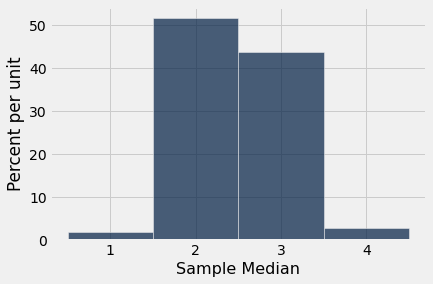

In [82]:
simulated_medians.hist(bins=np.arange(0.5, 5, 1))